In [1]:
import sys
sys.path.append('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/')

import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Hyperparam_Testing.Testing_Notebooks.Common_Functions as cf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import os
from keras.regularizers import l2
import Hyperparam_Testing.Testing_Notebooks.chirallag as cL

import matplotlib
matplotlib.rcParamsDefault

matplotlib.rcParams.update({'font.size': 16})


In [2]:
data = cf.gen_and_load(1000000,100000)
train_x ,train_y = data[0]
val_x,val_y = data[1]

In [3]:
model = models.load_model('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Optimised_Network/Saved_Optimised_Networks/106datapoints.h5')
v_nn = model.predict(train_x)[:,0]

2022-02-10 07:57:45.384336: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 07:57:45.389488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 07:57:45.389675: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-10 07:57:45.390054: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

Text(0.5, 0, '$V(\\phi)$')

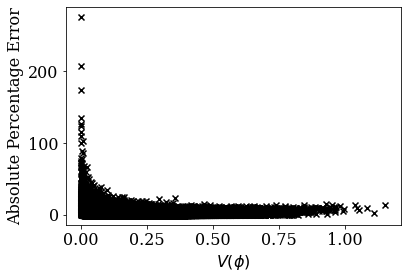

In [ ]:
ape = abs((v_nn-train_y)/train_y)


fig , ax = plt.subplots(1)
ax.scatter(train_y,ape*100, marker = 'x', c = 'black')
ax.set_ylabel('Absolute Percentage Error')
ax.set_xlabel('$V(\phi)$')



In [ ]:
cutoff = 0.25
fraction  = len(np.where(train_y>cutoff)[0])
print('Fraction of Data with $V(\phi)>{}$ = {}'.format(cutoff,fraction/train_y.shape[0]))

Fraction of Data with $V(\phi)>0.25$ = 0.12309666666666666


In [ ]:
cutoffs = np.linspace(0,1,100)
fraction_mape = []
for i in cutoffs:
    index = np.where(train_y>i)
    fraction_mape.append(np.mean(abs((v_nn[index]-train_y[index])/train_y[index]))*100)

Text(0.5, 0, 'Minimum $V(\\phi)$')

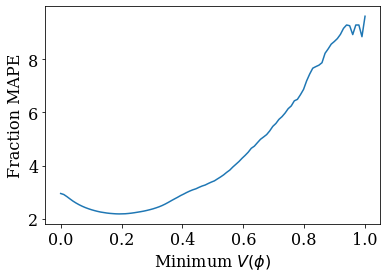

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(cutoffs,fraction_mape)
ax.set_ylabel('Fraction MAPE')
ax.set_xlabel('Minimum $V(\phi)$')



In [ ]:
Upper_cut = np.linspace(0.201,1.4,100)
train_y_2 = train_y[np.where(train_y>0.2)]
v_nn_2 = v_nn[np.where(train_y>0.2)]
fraction_mape = []
for i in Upper_cut:
    index = [train_y_2<i]   
    fraction_mape.append(np.mean(abs((v_nn_2[index]-train_y_2[index])/train_y_2[index]))*100)

/tmp/ipykernel_37705/2034218498.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  fraction_mape.append(np.mean(abs((v_nn_2[index]-train_y_2[index])/train_y_2[index]))*100)


In [ ]:
fraction_mape =np.nan_to_num(fraction_mape,0)

Text(0.5, 0, '0.2< $V(\\phi)< x $')

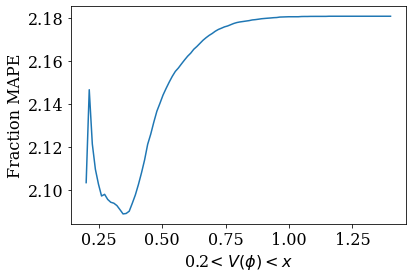

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(Upper_cut,fraction_mape)
ax.set_ylabel('Fraction MAPE')
ax.set_xlabel('0.2< $V(\phi)< x $')


In [ ]:
optimum_cut = round(Upper_cut[np.argmin(fraction_mape)],2)
print('Optimised MAPE on the interval $0.2<V(\phi)<{}$'.format(optimum_cut))
optimum_fraction = len(train_y[np.where(train_y_2<optimum_cut)])/train_y.shape[0]
print('Fraction of the data in optimum interval = {}'.format(optimum_fraction))

Optimised MAPE on the interval $0.2<V(\phi)<0.35$
Fraction of the data in optimum interval = 0.17409555555555556
